# Clustering Synthetic Data

Make sure to install graphviz on your PC to make it work

Windows machines need to set graphviz path

In [1]:
# Standard libraries
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

sns.set(style="ticks", color_codes=True)
import plotly.express as px

# Locate and load the data file
df = pd.read_csv("./EP_datasets/synthetic_clustering_dataset.csv")
print(f"#rows={len(df)} #columns={len(df.columns)}")

# Print some info and plots to get a feeling about the dataset
print(df.dtypes)

#rows=750 #columns=2
f1    float64
f2    float64
dtype: object


In [2]:
df.head()

,f1,f2
0,0.494261,1.451067
1,-1.428081,-0.837064
2,0.338559,1.038759
3,0.119001,-1.053976
4,1.122425,1.774937


<Axes: xlabel='f1', ylabel='f2'>

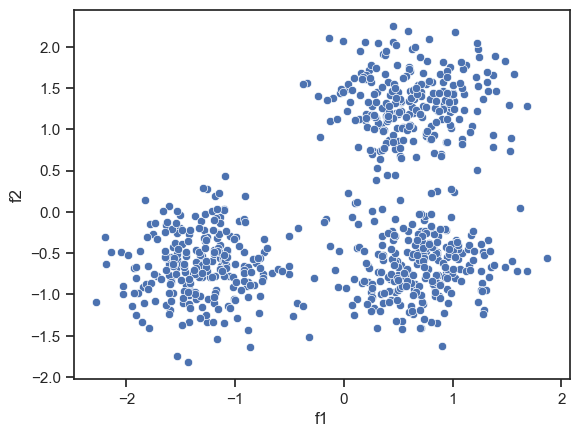

In [3]:
sns.scatterplot(x="f1", y="f2", data=df)

Based on the data distribution there must be 3 species in the dataset

Species 1 has feature 1 in range[-2.5, -0.5] and feature 2 in range [-2, 0.5]

Species 2 has feature 1 in range[0, 1.5] and feature 2 in range [-1.5, 0]

Species 3 has feature 1 in range[0, 1.5] and feature 2 in range [0.5, 2]

In [4]:
from sklearn.cluster import KMeans
from sklearn.metrics.cluster import contingency_matrix
from sklearn.metrics import adjusted_rand_score


def kmeans_k(_n_clusters, _X):
    km = KMeans(
        n_clusters=_n_clusters, init="random", n_init=10, max_iter=300, random_state=42
    )
    return km.fit_predict(_X), km.cluster_centers_

In [5]:
X = df.loc[:, df.columns].values

y_pred, centers = kmeans_k(3, X)

In [6]:
c = dict(enumerate(centers, 0))
c

{0: array([0.62260555, 1.3172598 ]),
 1: array([ 0.6954587 , -0.64442334]),
 2: array([-1.30266211, -0.65704205])}

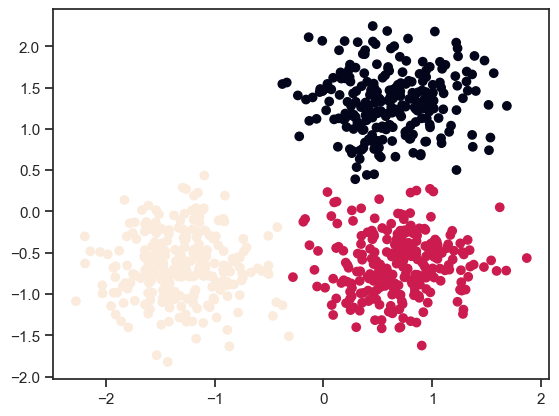

In [7]:
plt.scatter(X[:, 0], X[:, 1], c=y_pred)
plt.show()

In [8]:
# calculate distance from centroids


def dist(a, b):
    return np.sqrt((a - b) ** 2)


def distance_from_centroid(_X, _y_km, _centers):
    En = np.ndarray(shape=(len(_X), 2), dtype=float)
    Cn = np.ndarray(shape=(len(_X), 1), dtype=float)
    i = 0
    for x, c in zip(_X, _y_km):
        En[i] = dist(x, _centers[c])
        Cn[i] = np.sqrt(En[i, 0] ** 2 + En[i, 1] ** 2)
        i += 1
    return Cn

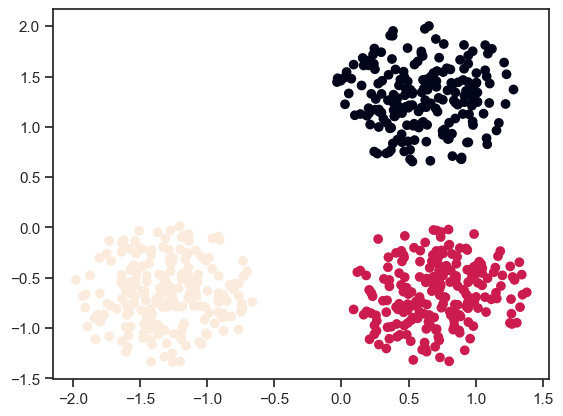

In [9]:
d = distance_from_centroid(X, y_pred, c).ravel()

# find index of points that are specified distance from centroid
far = np.where(d >= 0.7)

# remove points that are too far from centroid
x_short = np.delete(X, far, 0)
y_short = np.delete(y_pred, far, 0)

# plot results
plt.scatter(x_short[:, 0], x_short[:, 1], c=y_short)
plt.show()

## 4)

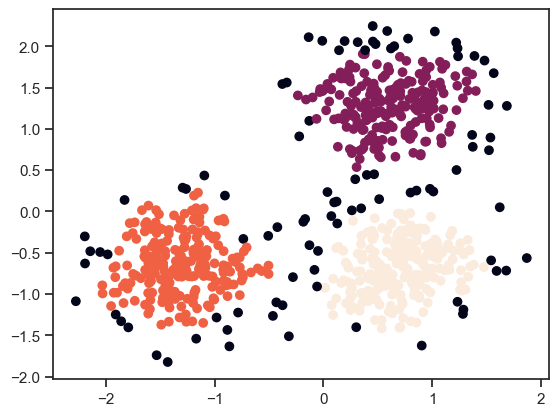

In [10]:
from sklearn.cluster import DBSCAN

db = DBSCAN(eps=0.2, min_samples=10).fit_predict(X)

plt.scatter(X[:, 0], X[:, 1], c=db)
plt.show()

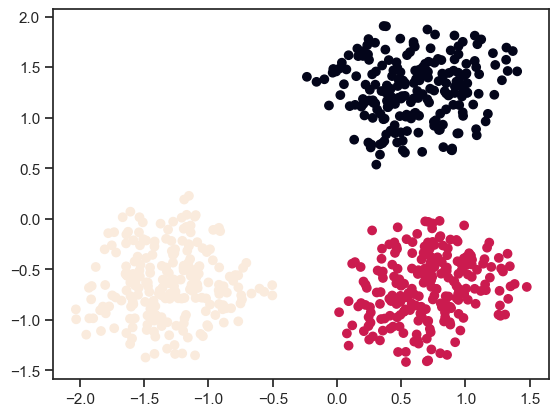

In [11]:
# find index of points that are specified distance from centroid
far = np.where(db < 0)

# remove points that are too far from centroid
x_short_db = np.delete(X, far, 0)
y_short_db = np.delete(y_pred, far, 0)

# plot results
plt.scatter(x_short_db[:, 0], x_short_db[:, 1], c=y_short_db)
plt.show()

In [12]:
%matplotlib inline
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from sklearn.tree import export_graphviz
from IPython.display import Image
from subprocess import run, PIPE

import graphviz

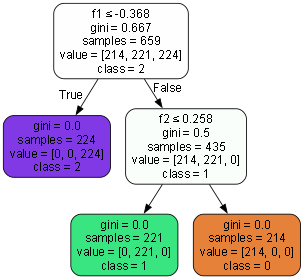

In [13]:
clf = DecisionTreeClassifier(random_state=0)
tree_clean = clf.fit(x_short_db, y_short_db)

# export_graphviz will generate a DOT image file in the folder with this notebook
dot_data = export_graphviz(
    tree_clean,
    out_file="results/tree_clean.dot",
    feature_names=["f1", "f2"],
    class_names=["0", "1", "2"],
    filled=True,
    rounded=True,
    special_characters=True,
)

# Convert the DOT file to PNG
run(
    [
        "dot",
        "-Tpng",
        "results/tree_clean.dot",
        "-o",
        "results/tree_clean.png",
        "-Gdpi=60",
    ],
    shell=True,
)

# Display the decision tree_clean
Image(filename="results/tree_clean.png")


Running the data with outliers creates more branches that need to be resovled. Cleaning the data helps make more distinct seperations between the clusters which creates a simpler decision tree.

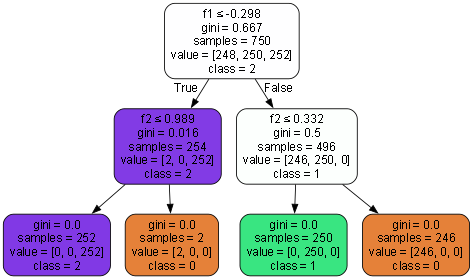

In [14]:
tree = clf.fit(X, y_pred)

# export_graphviz will generate a DOT image file in the folder with this notebook
dot_data = export_graphviz(
    tree,
    out_file="results/tree.dot",
    feature_names=["f1", "f2"],
    class_names=["0", "1", "2"],
    filled=True,
    rounded=True,
    special_characters=True,
)

# Convert the DOT file to PNG
run(
    ["dot", "-Tpng", "results/tree.dot", "-o", "results/tree.png", "-Gdpi=60"],
    shell=True,
)

# Display the decision tree
Image(filename="results/tree.png")